# **Housing Price Prediction Project**
The objective of this project is to analyze the Ames Iowa Housing dataset to identify the key factors influencing residential property prices and to build a regression model capable of predicting house sale prices.
The Ames dataset, a modern alternative to the classic Boston Housing dataset, includes detailed information on over 1,400 homes and more than 80 features describing property characteristics, location, and quality.

Dataset: [Ames Iowa Housing Data](https://www.kaggle.com/datasets/marcopale/housing) 🏡

### **1. Exploratory Data Analysis (EDA)**

Based on the initial data exploration:

*   **Data Types**: The dataset contains a mix of data types, with 43 features being categorical (`object`), 35 being integer (`int64`), and 3 being float (`float64`). This mix indicates that we will need to handle both numerical and categorical data appropriately during preprocessing.
*   **Initial Data Quality**: The presence of a significant number of 'object' type features suggests that many columns contain text-based data, which will require encoding for most machine learning models. We also observed the presence of missing values in several columns, which will need to be addressed.
*   **SalePrice Distribution**: The histogram of the 'SalePrice' shows a right-skewed distribution, meaning there are more houses with lower sale prices and fewer houses with very high sale prices. This skewness often necessitates a transformation (like the log transformation we performed later) to meet the assumptions of linear models and improve performance.

In [146]:
#@title 📖 Data Dictionary - Ames Housing Dataset

data_dict = pd.DataFrame({
    'Feature': [
        'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
        'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
        'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
        'SaleType', 'SaleCondition', 'SalePrice'
    ],
    'Description': [
        'Type of dwelling involved in the sale',
        'General zoning classification',
        'Linear feet of street connected to property',
        'Lot size in square feet',
        'Type of road access to property',
        'General shape of property',
        'Flatness of the property',
        'Type of utilities available',
        'Lot configuration',
        'Slope of property',
        'Physical locations within Ames city limits',
        'Proximity to various conditions',
        'Proximity to various conditions (if more than one)',
        'Type of dwelling',
        'Style of dwelling',
        'Overall material and finish quality (1-10)',
        'Overall condition rating (1-10)',
        'Original construction date',
        'Remodel date',
        'Type of roof',
        'Roof material',
        'Exterior covering on house',
        'Exterior covering (if more than one material)',
        'Masonry veneer type',
        'Masonry veneer area in square feet',
        'Quality of exterior material',
        'Condition of exterior material',
        'Type of foundation',
        'Height of the basement',
        'General condition of the basement',
        'Walkout or garden level walls',
        'Rating of basement finished area',
        'Type 1 finished square feet',
        'Rating of basement finished area (if multiple types)',
        'Type 2 finished square feet',
        'Unfinished square feet of basement',
        'Total square feet of basement',
        'Type of heating',
        'Heating quality and condition',
        'Central air conditioning',
        'Electrical system',
        'First floor square feet',
        'Second floor square feet',
        'Low quality finished square feet',
        'Above grade living area square feet',
        'Basement full bathrooms',
        'Basement half bathrooms',
        'Full bathrooms above grade',
        'Half bathrooms above grade',
        'Bedrooms above grade',
        'Kitchens above grade',
        'Kitchen quality',
        'Total rooms above grade',
        'Home functionality rating',
        'Number of fireplaces',
        'Fireplace quality',
        'Garage location',
        'Year garage was built',
        'Interior finish of garage',
        'Size of garage in car capacity',
        'Size of garage in square feet',
        'Garage quality',
        'Garage condition',
        'Paved driveway',
        'Wood deck area in square feet',
        'Open porch area in square feet',
        'Enclosed porch area in square feet',
        'Three season porch area in square feet',
        'Screen porch area in square feet',
        'Pool area in square feet',
        'Pool quality',
        'Fence quality',
        'Miscellaneous feature not covered elsewhere',
        'Dollar value of miscellaneous feature',
        'Month sold',
        'Year sold',
        'Type of sale',
        'Condition of sale',
        'Property sale price in dollars'
    ],
    'Type': [
        'Categorical', 'Categorical', 'Numeric', 'Numeric', 'Categorical',
        'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
        'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
        'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Categorical',
        'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Numeric',
        'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
        'Categorical', 'Categorical', 'Numeric', 'Categorical', 'Numeric',
        'Numeric', 'Numeric', 'Categorical', 'Categorical', 'Categorical',
        'Categorical', 'Numeric', 'Numeric', 'Numeric', 'Numeric',
        'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric',
        'Numeric', 'Categorical', 'Numeric', 'Categorical', 'Numeric',
        'Categorical', 'Categorical', 'Numeric', 'Categorical', 'Numeric',
        'Numeric', 'Categorical', 'Categorical', 'Categorical', 'Numeric',
        'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric',
        'Categorical', 'Categorical', 'Categorical', 'Numeric', 'Numeric', 'Numeric',
        'Categorical', 'Categorical', 'Numeric'
    ]
})

# print(data_dict.to_string(index=False))
# Style the dataframe for better display
styled_dict = data_dict.style.set_properties(**{
    'text-align': 'left',
    'font-size': '11pt',
    'border': '1px solid #ddd'
}).set_table_styles([
    {'selector': 'th', 'props': [
        ('background-color', '#D8BFD8'),
        ('color', 'white'),
        ('font-weight', 'bold'),
        ('text-align', 'left'),
        ('padding', '10px'),
        ('font-size', '12pt')
    ]},
    {'selector': 'td', 'props': [
        ('padding', '8px'),
        ('border', '1px solid #ddd')
    ]},
    {'selector': 'tr:nth-child(even)', 'props': [
        ('background-color', '#f9f9f9')
    ]},
    {'selector': 'tr:hover', 'props': [
        ('background-color', '#f1f1f1')
    ]}
]).hide(axis='index')

display(styled_dict)

Feature,Description,Type
MSSubClass,Type of dwelling involved in the sale,Categorical
MSZoning,General zoning classification,Categorical
LotFrontage,Linear feet of street connected to property,Numeric
LotArea,Lot size in square feet,Numeric
Street,Type of road access to property,Categorical
LotShape,General shape of property,Categorical
LandContour,Flatness of the property,Categorical
Utilities,Type of utilities available,Categorical
LotConfig,Lot configuration,Categorical
LandSlope,Slope of property,Categorical


In [39]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn Preprocessing Tools
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression # Used for optional feature selection

# Scikit-learn Models
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [40]:
# Loading Data
df = pd.read_csv('train.csv')
df.head(10)

print("🏡 Ames Housing Dataset Loaded!")
print(f"   Shape: {df.shape[0]} houses, {df.shape[1]} features")
print("\n👀 Sample data:")
print(df.head(10))

🏡 Ames Housing Dataset Loaded!
   Shape: 1460 houses, 81 features

👀 Sample data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...

In [41]:
num_features = df.select_dtypes(include=np.number).columns.tolist()
cat_features = df.select_dtypes(include='object').columns.tolist()
print(f"Total Numerical Features: {len(num_features)}")
print("Numerical Features:", ", ".join(num_features))
print(f"\nTotal Categorical Features: {len(cat_features)}")
print("Categorical Features:", ", ".join(cat_features))

Total Numerical Features: 38
Numerical Features: Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice

Total Categorical Features: 43
Categorical Features: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, 

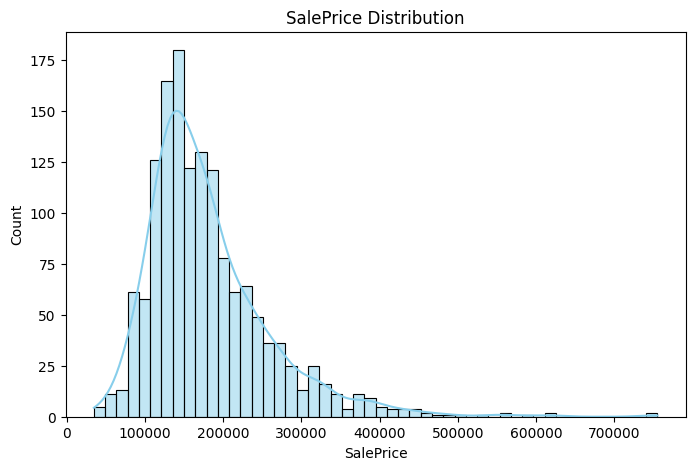

In [42]:
# Visualize sale price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], bins=50, kde=True, color='skyblue')
plt.title('SalePrice Distribution')
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

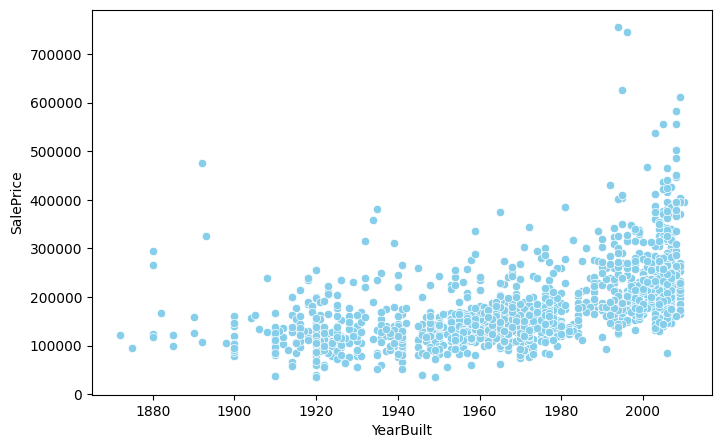

In [43]:
# visualize the relationship between SalePrice and YearBuilt
plt.figure(figsize=(8,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, color='skyblue')
plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

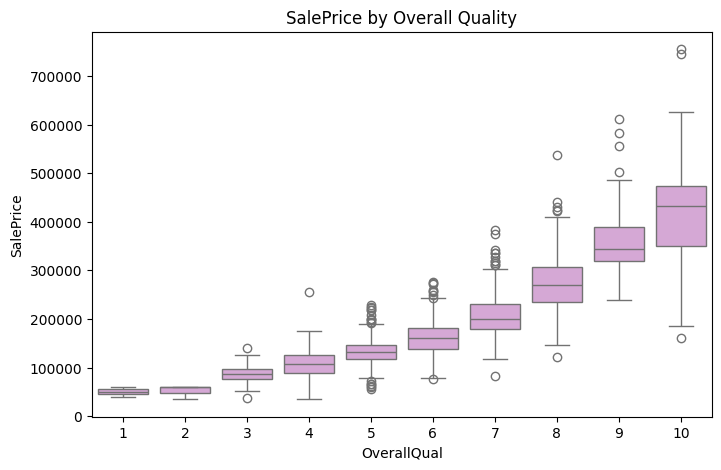

In [44]:
# Relationship between SalePrice and OverallQuality
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, color='plum')
plt.title('SalePrice by Overall Quality')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

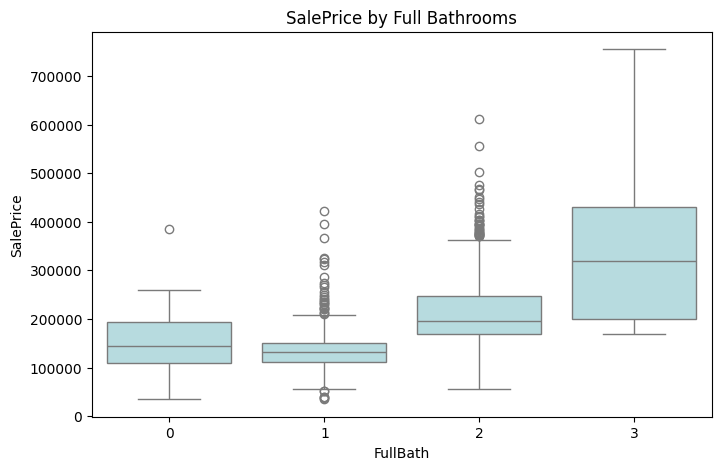

In [45]:
# Visualize the relationship between SalePrice and FullBath
plt.figure(figsize=(8,5))
sns.boxplot(x='FullBath', y='SalePrice', data=df, color='powderblue')
plt.title('SalePrice by Full Bathrooms')
plt

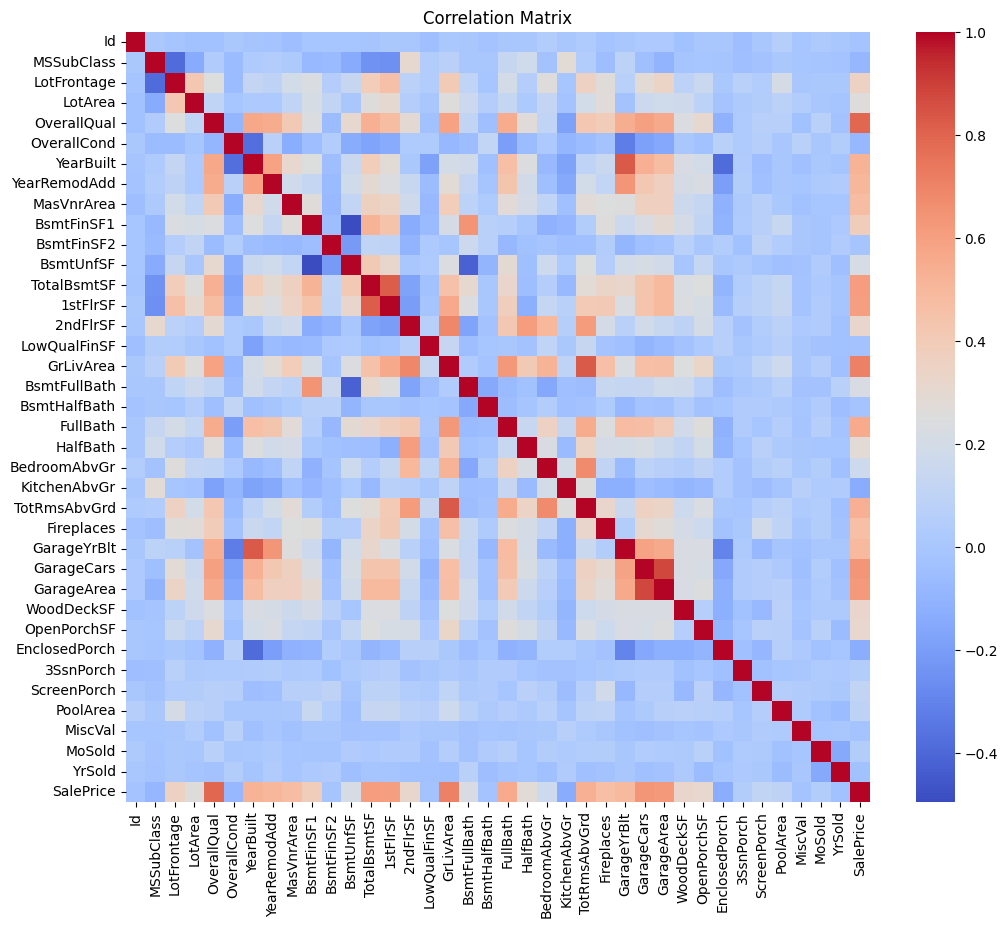

In [46]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **2. Data Cleaning and Preprocessing**
#### *2.1 Check for Missing Data:*

- Several columns have a significant number of missing values. For example, `PoolQC` has 1453 missing values out of 1460 observations, likely because most houses in the dataset do not have pools. Similarly, `MiscFeature`, `Alley`, and `Fence` also have a high proportion of missing values, suggesting the absence of these features in many properties.

- Our strategy for handling missing data will be a combination of dropping columns with a very high percentage of missing values and imputing the remaining missing values. We will drop columns like `Alley`, `PoolQC`, `Fence`, and `MiscFeature` due to the sheer number of missing entries. For features with fewer missing values, we will impute them. Numerical missing values will be imputed with the median of the column, and categorical missing values will be imputed with a placeholder like 'None'.

In [47]:
print("📊 Exploring the Ames Housing Dataset:")
print("\nℹ️ Descriptive statistics:")
display(df.describe())

📊 Exploring the Ames Housing Dataset:

ℹ️ Descriptive statistics:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [48]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Missing Data:")
print("\nℹ️ Checking for missing values:")
print(missing_data.sort_values(ascending=False))

print("\nℹ️ Checking data types:")
print(df.dtypes)


Missing Data:

ℹ️ Checking for missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

ℹ️ Checking data types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


#### *2.2 Handling Missing Data:*

*   **Imputing Numerical Features with Median:** We chose to impute missing numerical values with the median instead of the mean because the 'SalePrice' distribution was skewed. The median is less sensitive to outliers than the mean, making it a more robust choice for handling missing values in skewed distributions.
*   **Imputing Categorical Features with 'None':** For categorical features with missing values, we imputed them with the string 'None'. This approach treats 'None' as a separate category, which is appropriate for features where a missing value likely indicates the absence of that particular characteristic (e.g., a missing `FireplaceQu` likely means there is no fireplace).
*   **Dropping Columns:** Columns like 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' were dropped because they had a very high percentage of missing values. Imputing such a large proportion of missing data could introduce significant bias or noise into the dataset, making it more appropriate to remove these columns entirely.

In [49]:
df[num_features] = df[num_features].fillna(df[num_features].median())
df[cat_features] = df[cat_features].fillna('None')

In [50]:
# Dropping columns with the most missing values
cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns=cols_to_drop, inplace=True)

In [51]:
missing_data = df.isnull().sum()
missing_data

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


####*2.3 Target Variable Transformation*

The 'SalePrice' variable initially shows a right-skewed distribution, which can violate the assumptions of some linear models and lead to less accurate predictions. To address this, a **log transformation** was applied to 'SalePrice'.

*   **Why Log Transformation?**
    *   **Reduces Skewness:** The logarithm function compresses the larger values more than the smaller values, effectively pulling in the right tail of the distribution and making it more symmetrical and closer to a normal distribution.
    *   **Stabilizes Variance:** Log transformation can help in cases where the variability of the target variable increases with its mean (heteroscedasticity). Transforming the variable can make the variance more consistent across the range of values.
    *   **Meets Model Assumptions:** Many linear models assume that the residuals are normally distributed. Transforming the target variable can help meet this assumption and improve the reliability of the model's coefficients and predictions.

*   **Interpreting the Q-Q Plot:**
    The Q-Q (Quantile-Quantile) plot compares the quantiles of the log-transformed 'SalePrice' distribution to the quantiles of a theoretical normal distribution.
    *   If the points on the Q-Q plot fall closely along the diagonal line, it suggests that the distribution of `LogSalePrice` is approximately normal.
    *   Deviations from the line, especially at the tails, indicate departures from normality. In our plot, the points are much closer to the line after the log transformation compared to the original 'SalePrice', indicating that the transformation was largely successful in achieving normality.

*   **Skewness Statistics:**
    To quantify the effect of the transformation on skewness, we can calculate the skewness of the original 'SalePrice' and the `LogSalePrice`.

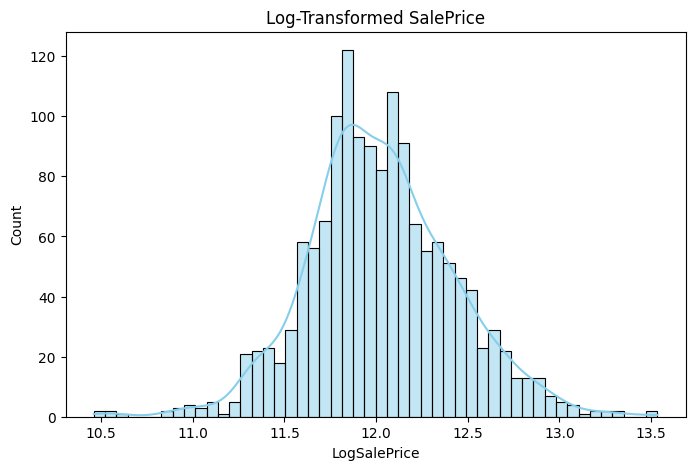

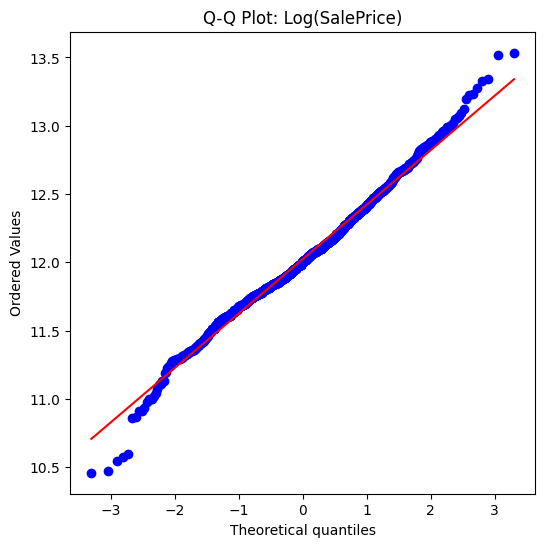

In [52]:
df['LogSalePrice'] = np.log(df['SalePrice'])
plt.figure(figsize=(8,5))
sns.histplot(df['LogSalePrice'], bins=50, kde=True, color='skyblue')
plt.title('Log-Transformed SalePrice')
plt.show()
plt.figure(figsize=(6,6))
stats.probplot(df['LogSalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Log(SalePrice)')
plt.show()

#### *2.4 Feature Engineering*

In this section, we transformed the raw features into a format more suitable for our Linear Regression model.

*   **Quality Mapping:** We applied a numerical mapping to ordinal categorical features representing quality levels (e.g., `ExterQual`, `BsmtQual`, etc.). Since these features have an inherent order (Excellent is better than Good, which is better than Fair), mapping them to numerical values (1 to 5) preserves this order and allows the model to interpret these relationships.
*   **One-Hot Encoding:** For the remaining categorical features without a natural order (nominal features like `MSZoning`, `Neighborhood`, etc.), we used one-hot encoding. This technique creates binary (0 or 1) indicator columns for each category, preventing the model from assuming any ordinal relationship between categories that don't exist.
*   **Feature Creation:** While we performed basic encoding, further feature engineering could involve creating new features from existing ones. Examples include:
    *   **Total Square Footage:** Summing up different area features (e.g., `1stFlrSF`, `2ndFlrSF`, `TotalBsmtSF`).
    * **Total Bathrooms:**
    Summing up the total number of bathrooms.
    *   **House Age:** Calculating the difference between the sale year and the year built (`YrSold` - `YearBuilt`).
    *   **Remodel Age:** Calculating the difference between the sale year and the year of the last remodel (`YrSold` - `YearRemodAdd`).

    These new features could potentially capture more complex relationships in the data and improve model performance.

In [53]:
# Mapping from categorical quality levels (Poor, Fair, Average, Good, Excellent)
# to corresponding numerical values (1 to 5)
qual_mapping = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
ordinal_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
                'KitchenQual','FireplaceQu','GarageQual','GarageCond']
for col in ordinal_cols:
    df[col] = df[col].map(qual_mapping)

In [54]:
# Transforming the categorical features into numerical format
# using one-hot encoding, making them suitable for training a linear
# regression model.
df_encoded = pd.get_dummies(df, drop_first=True)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [55]:
# Create new features
df['TotalBathrooms'] = (
    df['FullBath'] +
    0.5 * df['HalfBath'] +
    df['BsmtFullBath'] +
    0.5 * df['BsmtHalfBath']
)
df['Totalsqft'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['Remodeled'] = df['YearRemodAdd'] != df['YearBuilt']

In [56]:
df[['SalePrice','TotalBathrooms','Totalsqft','HouseAge','Remodeled']].sort_values(by='SalePrice', ascending=False).head(10)

,SalePrice,TotalBathrooms,Totalsqft,HouseAge,Remodeled
691,755000,4.0,6760,13,True
1182,745000,4.5,6872,11,False
1169,625000,4.5,5557,11,True
898,611657,3.5,4694,1,True
803,582933,3.5,4556,1,True
1046,556581,3.5,4860,1,True
440,555000,3.0,5496,1,False
769,538000,4.5,4929,7,False
178,501837,3.0,4450,1,True
798,485000,3.5,5066,1,True


#### *2.5 Train/Test Split*

In [74]:
# Prepare the data for train/test split
df_encoded['LogSalePrice'] = df['LogSalePrice']

X_housing = df_encoded.drop(['SalePrice', 'LogSalePrice'], axis=1)
y_housing = df_encoded['LogSalePrice']

# Split the data (fill in the blanks)
X_train, X_test, y_train, y_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)


In [75]:
from sklearn.impute import SimpleImputer

# Check for infinite values and replace with NaN first
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Use SimpleImputer to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())

NaNs in X_train: 0
NaNs in X_test: 0


### **3. Model Training**

In this step, we are going to use models such as Linear Regression, Random Forest, and XGBoost for predictive analysis towards future sale prices of houses located in Ames, Iowa. Our goal is to evaluate and compare between these models and decide which one is the most efficient to apply for this task using key evaluation metrics such as $R^{2}$ and **RMSE**.

In [76]:
# Train the OLS Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE (log-scale): {rmse:.3f}")
print(f"Test R²: {r2:.3f}")

Test RMSE (log-scale): 0.205
Test R²: 0.775


In [86]:
# Create and Train the Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,
                                 max_depth=20,
                                 min_samples_split=2,
                                 random_state=42,
                                 n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Test RMSE (log-scale): {rmse_rf:.3f}")
print(f"Test R²: {r2_rf:.3f}")

Test RMSE (log-scale): 0.148
Test R²: 0.882


In [90]:
# Create and Train the XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Test RMSE (log-scale): {rmse_xgb:.3f}")
print(f"Test R²: {r2_xgb:.3f}")

Test RMSE (log-scale): 0.142
Test R²: 0.892



🏆 Housing Price Prediction Results:
        Model RMSE ($)  R² Score
          OLS   $20470  0.775472
Random Forest   $14821  0.882294
      XGBoost   $14171  0.892382

💡 Best Model: XGBoost

📝 Interpretation:
   • RMSE: Average prediction error
   • R²: Proportion of variance explained (closer to 1 is better)


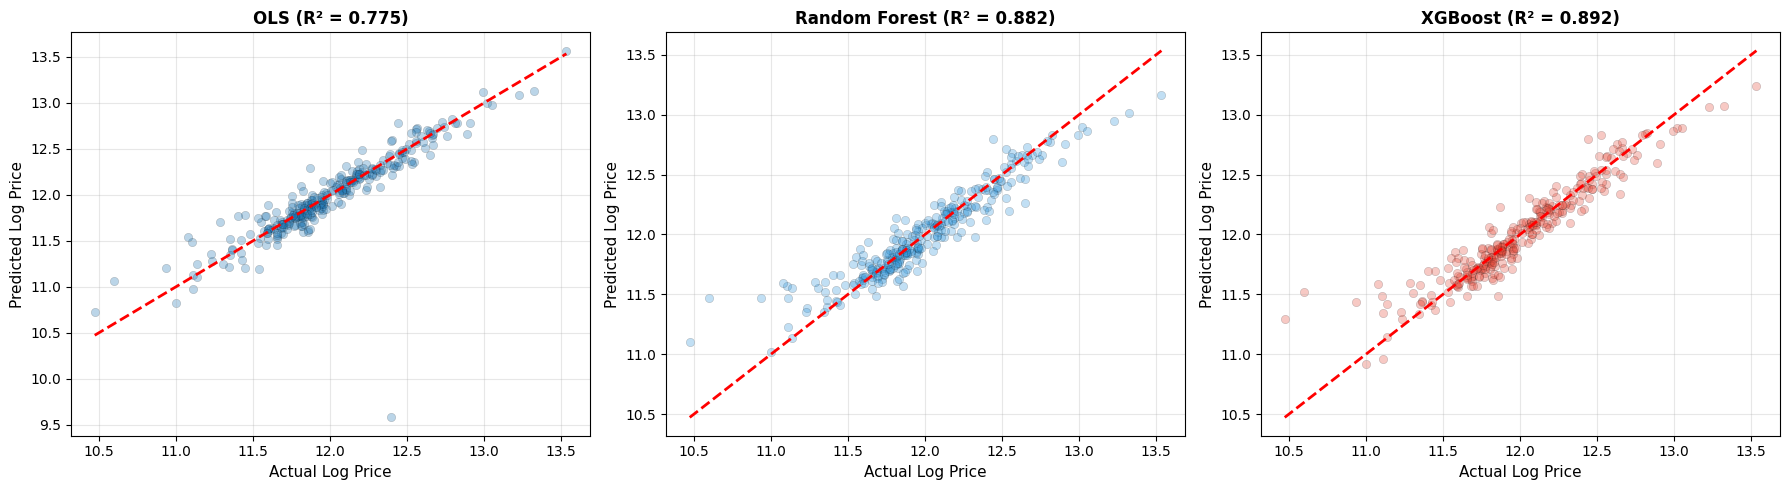

In [100]:
# Results table
results_housing = pd.DataFrame({
    'Model': ['OLS', 'Random Forest', 'XGBoost'],
    'RMSE ($)': [f'${rmse*100000:.0f}', f'${rmse_rf*100000:.0f}', f'${rmse_xgb*100000:.0f}'],
    'R² Score': [r2, r2_rf, r2_xgb]
})
print("\n🏆 Housing Price Prediction Results:")
print(results_housing.to_string(index=False))
print(f"\n💡 Best Model: {results_housing.loc[results_housing['R² Score'].idxmax(), 'Model']}")
print(f"\n📝 Interpretation:")
print(f"   • RMSE: Average prediction error")
print(f"   • R²: Proportion of variance explained (closer to 1 is better)")

# Visualize Predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# OLS
axes[0].scatter(y_test, y_pred, alpha=0.3, edgecolors='black', linewidth=0.3)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Log Price', fontsize=11)
axes[0].set_ylabel('Predicted Log Price', fontsize=11)
axes[0].set_title(f'OLS (R² = {r2:.3f})', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.3, edgecolors='black', linewidth=0.3, color='#3498DB')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Log Price', fontsize=11)
axes[1].set_ylabel('Predicted Log Price', fontsize=11)
axes[1].set_title(f'Random Forest (R² = {r2_rf:.3f})', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# XGBoost
axes[2].scatter(y_test, y_pred_xgb, alpha=0.3, edgecolors='black', linewidth=0.3, color='#E74C3C')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Log Price', fontsize=11)
axes[2].set_ylabel('Predicted Log Price', fontsize=11)
axes[2].set_title(f'XGBoost (R² = {r2_xgb:.3f})', fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [64]:
# Compute correlation with SalePrice
corr = df.corr(numeric_only=True)

# Sort correlations with SalePrice
top_corr = corr['SalePrice'].sort_values(ascending=False)

# Display top 10 correlated features
print(top_corr.head(10))

SalePrice         1.000000
LogSalePrice      0.948374
OverallQual       0.790982
Totalsqft         0.782260
GrLivArea         0.708624
ExterQual         0.682639
KitchenQual       0.659600
BsmtQual          0.644019
GarageCars        0.640409
TotalBathrooms    0.631731
Name: SalePrice, dtype: float64


In [106]:
import statsmodels.api as sm

features = ['OverallQual','Totalsqft','GrLivArea','ExterQual','KitchenQual',
            'TotalBathrooms','GarageCars']
X = df[features]
y = np.log(df['SalePrice'])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
ols_sm_model = model
print("\n📊 Detailed OLS Statistical Summary:")
print(ols_sm_model.summary())

print(f"\n📈 Additional Metrics:")
print(f"   • Adjusted R²: {ols_sm_model.rsquared_adj:.3f}")
print(f"   • AIC: {ols_sm_model.aic:.2f}")
print(f"   • BIC: {ols_sm_model.bic:.2f}")


📊 Detailed OLS Statistical Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     960.3
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        07:09:04   Log-Likelihood:                 530.09
No. Observations:                1460   AIC:                            -1044.
Df Residuals:                    1452   BIC:                            -1002.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const  

**Model Evaluations:**

**1. Linear Regression (OLS)**

The Linear Regression model achieved a Test RMSE of $20,470 and an R² of 0.775.

*   **R² (0.775):** The model explains 77.5% of the variance in log-transformed sale prices, showing a good fit. This means our features capture most of what determines housing prices.

*   **RMSE (\$20,470):** This is the average prediction error. On average, the model's predictions are off by about $20,470.

*   **Strengths:** Easy to interpret - we can see exactly how each feature affects price. The statsmodels summary shows which features are statistically significant.
*   **Limitations:** Assumes linear relationships, so it might miss complex patterns like how quality affects price differently for small vs. large homes.

**2. Random Forest**

The Random Forest model achieved a Test RMSE of $14,821 and an R² of 0.882.

*   **R² (0.882):** A significant improvement over OLS, explaining 88.2% of variance. The model captures non-linear relationships and interactions between features that OLS misses.
*   **RMSE (\$14,821):** About $5,650 more accurate than OLS, representing a 28% improvement in prediction error.
*   **Strengths:** Handles complex patterns automatically without needing manual feature engineering. Provides feature importance rankings to see what matters most. Robust to outliers.
*   **Limitations:** Harder to explain individual predictions compared to OLS. Acts like a "black box" that works well but doesn't show its reasoning.

**3. XGBoost**

The XGBoost model achieved a Test RMSE of $14,171 and an R² of 0.892.

*   **R² (0.892):** The best performance of all three models, explaining 89.2% of variance. This is a 11.7 percentage point improvement over OLS.
*   **RMSE (\$14,171):** The lowest error at \$14,171, which is \$6,299 better than OLS (31% improvement) and $650 better than Random Forest.
*   **Strengths:** State-of-the-art accuracy through gradient boosting. Each tree focuses on correcting errors from previous trees, leading to better overall predictions.
*   **Limitations:** Most complex to tune with multiple hyperparameters. Least interpretable of the three models.

**Overall Comparison:**

*   **Accuracy Winner:** XGBoost (R² = 0.892, RMSE = $14,171)
*   **Interpretability Winner:** OLS (clear coefficients and statistical significance)
*   **Best Balance:** Random Forest (strong accuracy with some interpretability through feature importance)
*   All three models agree that OverallQual, Totalsqft, and GrLivArea are the most important predictors.
*   Tree-based models (Random Forest and XGBoost) significantly outperform OLS by capturing non-linear relationships, reducing prediction error by roughly 30%.
*   Choose OLS when you need to explain predictions clearly. Choose XGBoost when prediction accuracy is most important. Choose Random Forest as a middle ground.Claude is AI and can make mistakes. Please double-check responses.

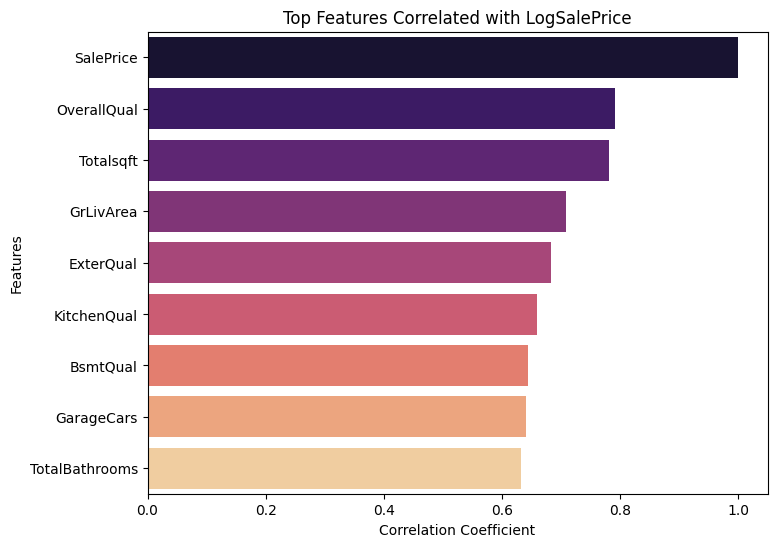

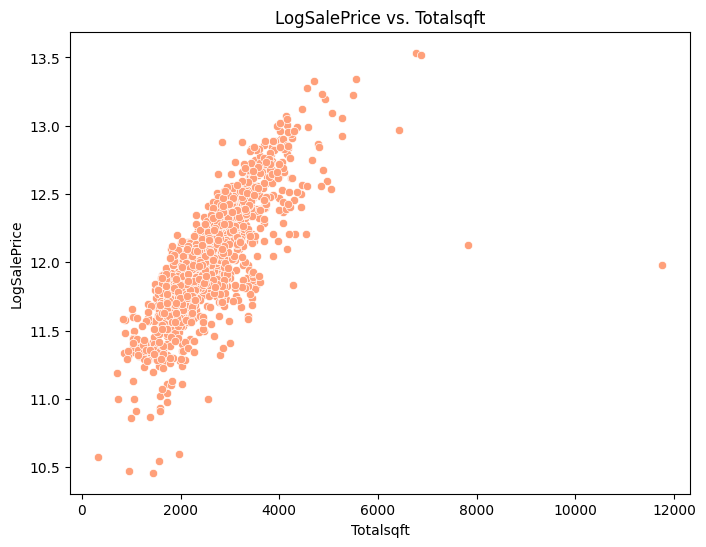

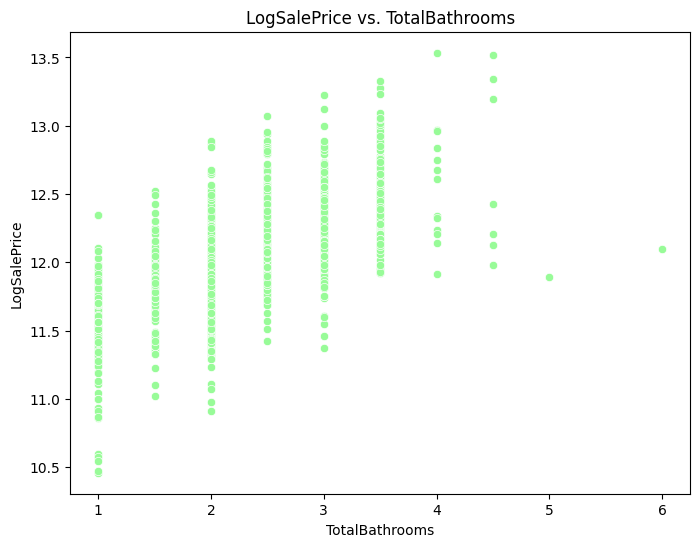

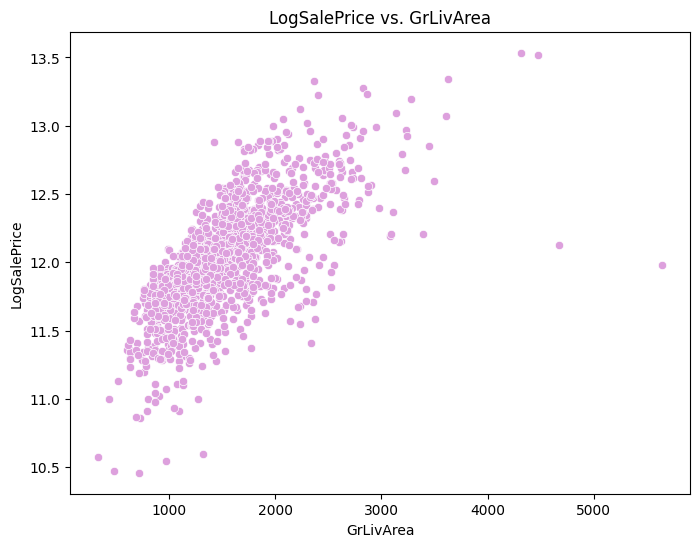

In [126]:
# Top Features
plt.figure(figsize=(8, 6))
top_features_corr = top_corr.head(10).drop('LogSalePrice')
sns.barplot(x=top_features_corr.values, y=top_features_corr.index, hue=top_features_corr.index, palette='magma', legend=False)
plt.title('Top Features Correlated with LogSalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features') # Added y-label for clarity
plt.show()

# Visualization between LogSalePrice and Totalsqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Totalsqft', y='LogSalePrice', data=df, color='lightsalmon')
plt.title('LogSalePrice vs. Totalsqft')
plt.xlabel('Totalsqft')
plt.ylabel('LogSalePrice')
plt.show()

# LogSalePrice vs. TotalBathrooms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalBathrooms', y='LogSalePrice', data=df, color='palegreen')
plt.title('LogSalePrice vs. TotalBathrooms')
plt.xlabel('TotalBathrooms')
plt.ylabel('LogSalePrice')
plt.show()

#LogSalePrice vs.GrLivArea
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='LogSalePrice', data=df, color='plum')
plt.title('LogSalePrice vs. GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('LogSalePrice')
plt.show()
